# TD de régression - Partie 1 - Régression linéaire

**Objectif de ce Notebook :**

L'objectif de ce notebook est de vous familiariser avec les modèles de régression. Nous allons voir l'entrainement d'un modèle de régression linéaire à partir de l'**équation normale**.

**Mots-clés :**

- **Equation normale**
- **Régression linéaire**
- **Erreur quadratique moyenne (MSE)**
- **Erreur absolue moyenne (MAE)**

**Ressources :**

- [Erreur absolue moyenne (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

___

▶️ Importer les **bibliothèques** nécessaires à l'activité

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

▶️ **Exécuter le code** de la fonction d'affichage des graphiques

In [18]:
def afficher_graphique(X, y, y_pred=None):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    if y_pred is not None:
        ax.plot(X, y_pred, 'g-', label='Droite de régression')
    ax.scatter(X, y, color='blue')
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    fig.suptitle("Entrainement d'un modèle de régression", fontsize=20, y=1)
    plt.show()

▶️ **Importer et afficher les données**

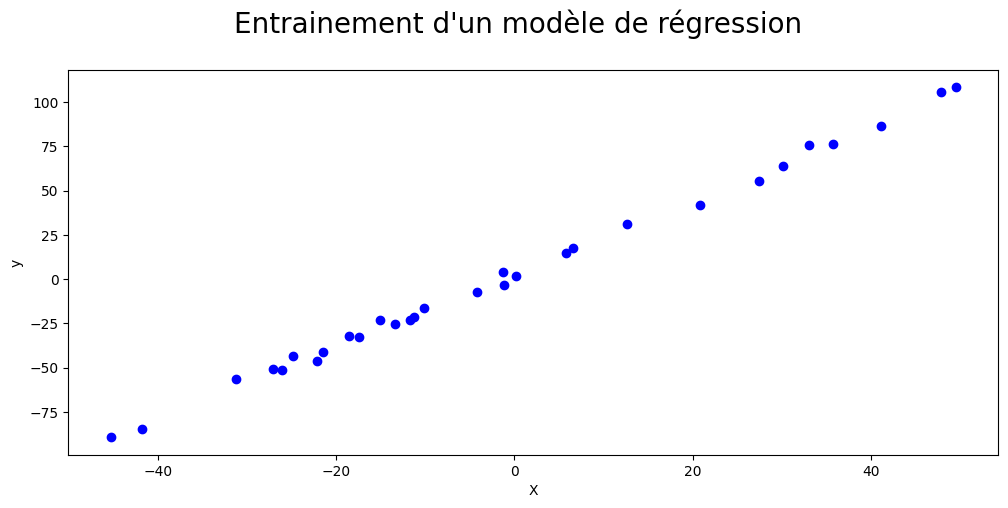

In [19]:
# Création du jeu de données
data = pd.read_csv('data_reg_1.csv')
X = data.iloc[:, 0].to_numpy()
y = data.iloc[:, 1].to_numpy()
afficher_graphique(X, y)

## 💻 Code à compléter

**Objectif :**

A l'aide de l'**équation normale**, appliquer une **régression linéaire** sur ces données à l'aide d'un **calcul matriciel**

**Etapes :**

- Récupérer la formule de l'**équation normale**
- Calculer les **coefficients de la régression linéaire** grâce à cette équation avec la bibliothèque Numpy
- Comparer les résultats à ceux de la **bibliothèque Scikit-learn**
- Afficher la **droite de régression** sur le graphique

**Ressources à utiliser :**

- [Inversion de matrice](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)
- [Produit matriciel](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
- [Transposition de matrices](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html)


$\boldsymbol{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [20]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Coefficients de la régression linéaire:", theta_best)

Coefficients de la régression linéaire: [3.47801243 2.05557968]


In [21]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)
reg.intercept_, reg.coef_[0]

(3.4780124255382594, 2.0555796798347528)

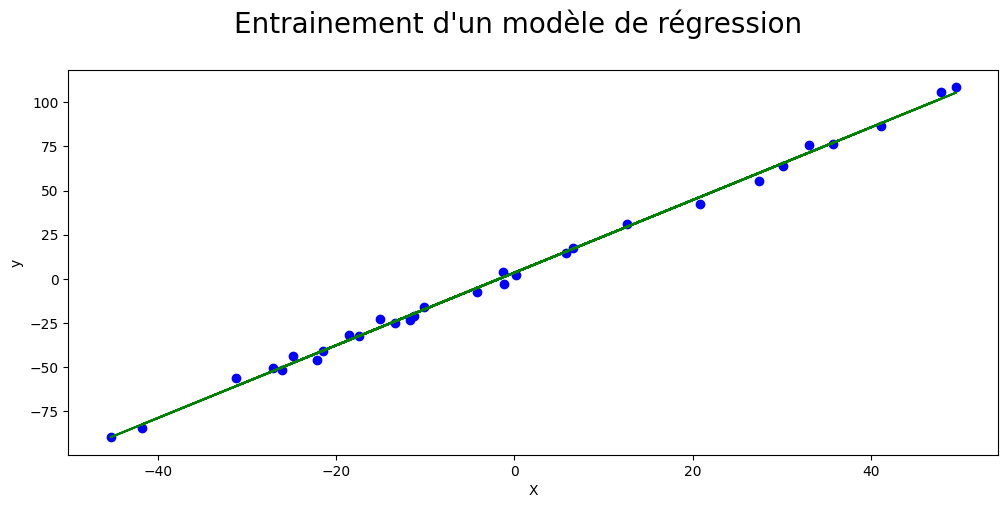

In [22]:
y_pred = theta_best[0] + theta_best[1] * X
afficher_graphique(X, y, y_pred)

## 💻 Code à compléter

**Objectif :**

Analyser la qualité de l'**entrainement du modèle** de régression

**Etapes :**

- **Calculer directement** (sans scikit-learn) les métriques suivantes : RMSE, MAE et R2
- Vérifier avec **Scikit-learn**
- Afficher le **graphique des résidus**

**Ressources à utiliser :**

- [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html)
- [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
- [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [23]:
RMSE = np.sqrt(np.mean((y - y_pred) ** 2))
MAE = np.mean(np.abs(y - y_pred))
ss_total = np.sum((y - np.mean(y_pred)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
R2 = 1 - (ss_residual / ss_total)

print(f"RMSE : {round(RMSE, 2)}\nMAE : {round(MAE, 2)}\nR2 : {round(R2, 2)}")

RMSE : 2.74
MAE : 2.34
R2 : 1.0


In [24]:
rmse = root_mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"RMSE avec Scikit-learn : {round(rmse, 2)}\nMAE avec Scikit-learn : {round(mae, 2)}\nR2 avec Scikit-learn : {round(r2, 2)}")

RMSE avec Scikit-learn : 2.74
MAE avec Scikit-learn : 2.34
R2 avec Scikit-learn : 1.0


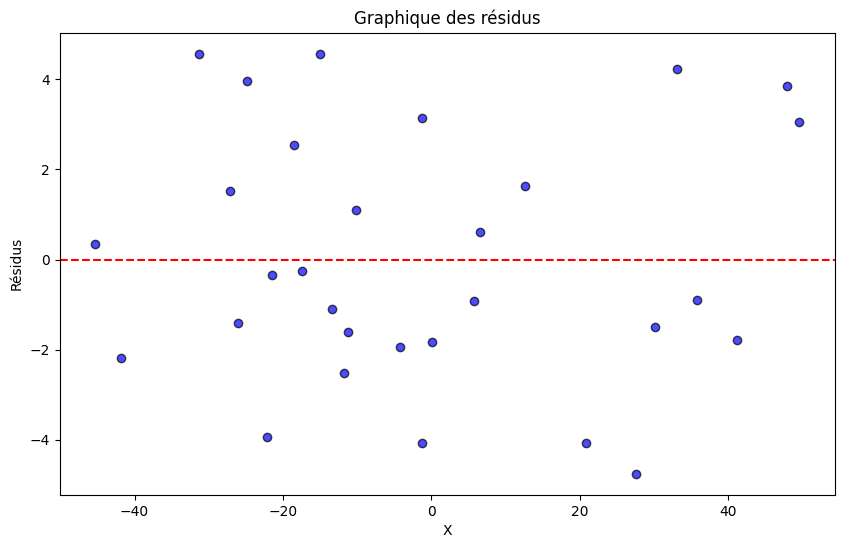

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y-y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Résidus')
plt.title('Graphique des résidus')
plt.show()